# Project: Wind Speed And Weather Analysis – Mace Head Wind Power Analysis
## Assessing Wind Energy Potential for Irish Wind Farms

**Location:** Mace Head, County Galway, Ireland (53.3256°N, 9.9988°W)
**Data Source:** 20 years of hourly meteorological observations (2005-2025)
**Purpose:** Analyze wind power potential, temporal patterns, and forecast future wind farm output

### Research Questions:
1. How much wind power is available at this location?
2. What are the realistic operating ranges for wind farms?
3. Are wind speeds showing any long-term trends?
4. How do other weather metrics correlate with wind speed?
5. What will wind farm power output look like in the coming week?

---

## Section 1: Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Loading Mace Head meteorological data...")
# Load the hourly data
df_hourly = pd.read_csv('mace_head_hourly_data.csv')
df_daily = pd.read_csv('mace_head_daily_data.csv')
df_monthly = pd.read_csv('mace_head_monthly_data.csv')

# Convert date columns to datetime
df_hourly['DateTime'] = pd.to_datetime(df_hourly['Date'] + ' ' + df_hourly['Time']) # Combine Date and Time for hourly data
df_daily['Date'] = pd.to_datetime(df_daily['Date'])
df_monthly['YearMonth'] = pd.to_datetime(df_monthly[['Year', 'Month']].assign(Day=1))

# Print data load confirmation and record counts
print(f"[+] Hourly data loaded: {len(df_hourly)} records")
print(f"[+] Daily data loaded: {len(df_daily)} records")
print(f"[+] Monthly data loaded: {len(df_monthly)} records")

# Display basic information
print("\n=== HOURLY DATA STRUCTURE ===")
print(f"Shape: {df_hourly.shape}")
print(f"Date Range: {df_hourly['DateTime'].min()} to {df_hourly['DateTime'].max()}")
print(f"\nColumns: {df_hourly.columns.tolist()}")
print(f"\nFirst few rows:")
print(df_hourly.head())

Loading Mace Head meteorological data...
[+] Hourly data loaded: 175221 records
[+] Daily data loaded: 7301 records
[+] Monthly data loaded: 241 records

=== HOURLY DATA STRUCTURE ===
Shape: (175221, 17)
Date Range: 2005-12-26 00:00:00 to 2025-12-21 20:00:00

Columns: ['Date', 'Time', 'Hour', 'Month', 'Year', 'Station', 'Latitude', 'Longitude', 'Temperature_C', 'Humidity_%', 'Pressure_hPa', 'Wind_Speed_kmh', 'Wind_Gust_kmh', 'Wind_Direction', 'Precipitation_mm', 'Weather_Condition', 'DateTime']

First few rows:
         Date   Time  Hour  Month  Year    Station  Latitude  Longitude  \
0  2005-12-26  00:00     0     12  2005  Mace Head   53.3256    -9.9988   
1  2005-12-26  01:00     1     12  2005  Mace Head   53.3256    -9.9988   
2  2005-12-26  02:00     2     12  2005  Mace Head   53.3256    -9.9988   
3  2005-12-26  03:00     3     12  2005  Mace Head   53.3256    -9.9988   
4  2005-12-26  04:00     4     12  2005  Mace Head   53.3256    -9.9988   

   Temperature_C  Humidity_%  Pr

## Section 2: Exploratory Data Analysis - Wind Speed Characteristics

=== WIND SPEED STATISTICS ===

SUSTAINED WIND SPEED (km/h):
  Mean:       20.01
  Median:     20.10
  Std Dev:    8.65
  Min:        5.00
  Max:        35.00
  Q25:        12.50
  Q75:        27.50

WIND GUST (km/h):
  Mean:       30.02
  Max:        50.00

Missing Values: 0


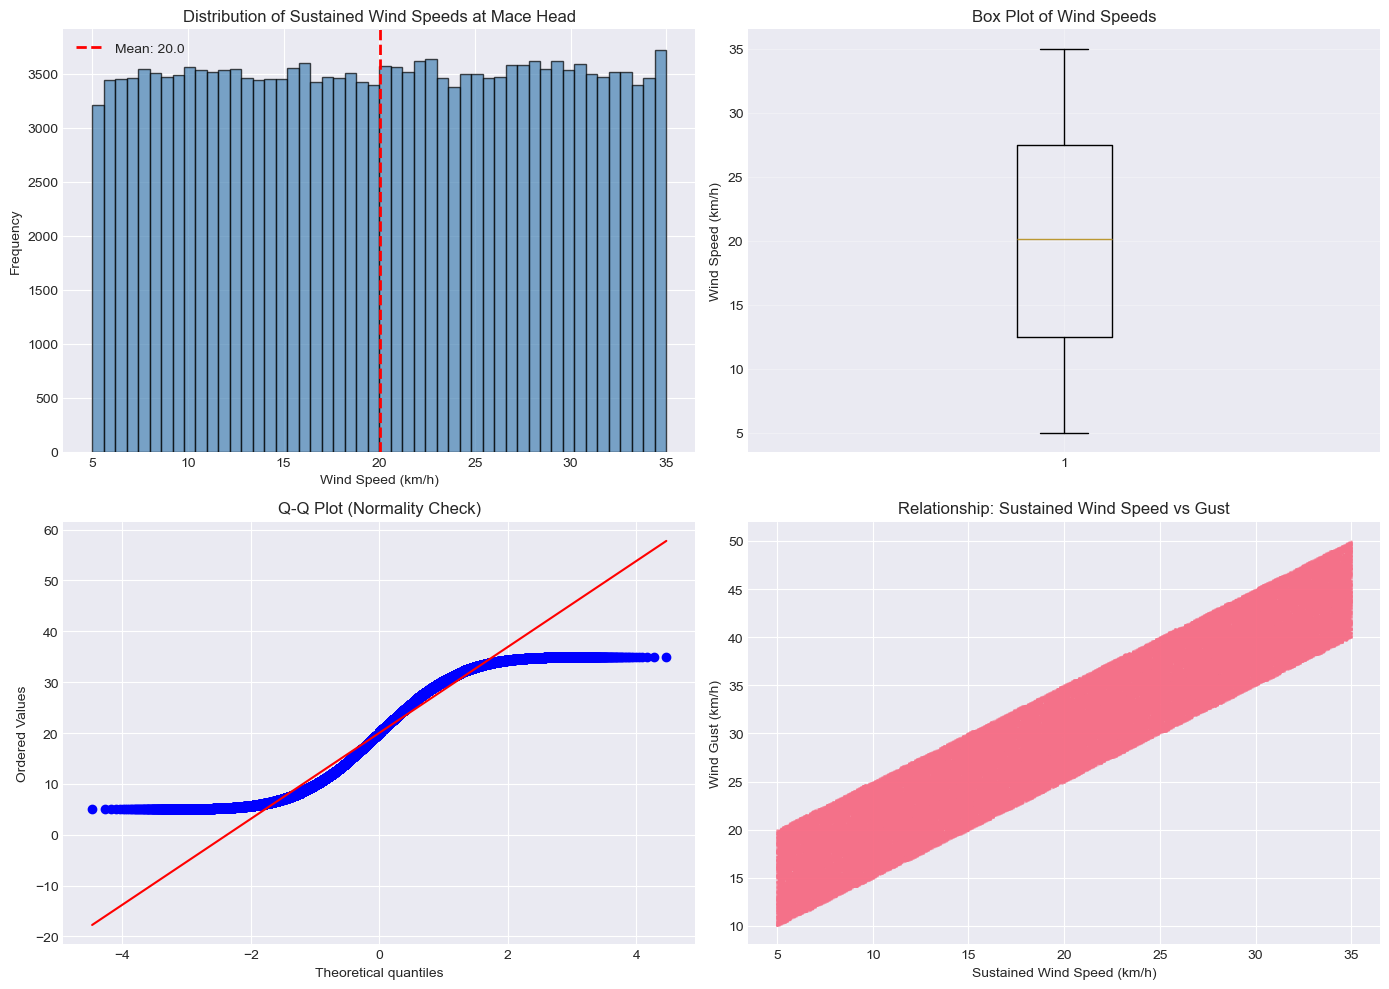


*** KEY INSIGHT: Mace Head experiences consistent strong winds from the Atlantic,
    with an average wind speed of 20.0 km/h, making it excellent
    for offshore and coastal wind farm development. ***


In [2]:
# Wind Speed Statistics
wind_speed = df_hourly['Wind_Speed_kmh']
wind_gust = df_hourly['Wind_Gust_kmh']

print("=== WIND SPEED STATISTICS ===\n")
print("SUSTAINED WIND SPEED (km/h):")

# Calculate descriptive statistics: mean, median, std dev
# Reference on descriptive statistics: https://pandas.pydata.org/docs/reference/api/pandas.Series.describe.html

print(f"  Mean:       {wind_speed.mean():.2f}")
print(f"  Median:     {wind_speed.median():.2f}")
print(f"  Std Dev:    {wind_speed.std():.2f}")
print(f"  Min:        {wind_speed.min():.2f}")
print(f"  Max:        {wind_speed.max():.2f}")

# Quartiles divide data into 4 equal parts (Q25 = 25th percentile, Q75 = 75th percentile)
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.Series.quantile.html
print(f"  Q25:        {wind_speed.quantile(0.25):.2f}")
print(f"  Q75:        {wind_speed.quantile(0.75):.2f}")

print("\nWIND GUST (km/h):")
print(f"  Mean:       {wind_gust.mean():.2f}")
print(f"  Max:        {wind_gust.max():.2f}")

# Check data quality by counting missing/null values
print(f"\nMissing Values: {df_hourly['Wind_Speed_kmh'].isna().sum()}")

# Create a 2x2 grid of visualization subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Histogram showing frequency distribution of wind speeds
# Bins divide data range into intervals; more bins = more detail
axes[0, 0].hist(wind_speed, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Wind Speed (km/h)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Sustained Wind Speeds at Mace Head')
axes[0, 0].axvline(wind_speed.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {wind_speed.mean():.1f}')
axes[0, 0].legend()

# Plot 2: Box plot showing quartiles and outliers
# Box shows Q1-Q3, line shows median, whiskers show outliers
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
axes[0, 1].boxplot(wind_speed, vert=True)
axes[0, 1].set_ylabel('Wind Speed (km/h)')
axes[0, 1].set_title('Box Plot of Wind Speeds')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Q-Q plot to test if data follows normal distribution
# Points on diagonal = normally distributed; deviation = non-normal
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html
stats.probplot(wind_speed, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot (Normality Check)')

# Plot 4: Scatter plot showing relationship between sustained wind and gust
axes[1, 1].scatter(wind_speed, wind_gust, alpha=0.3, s=1)
axes[1, 1].set_xlabel('Sustained Wind Speed (km/h)')
axes[1, 1].set_ylabel('Wind Gust (km/h)')
axes[1, 1].set_title('Relationship: Sustained Wind Speed vs Gust')

plt.tight_layout()
plt.show()

# Key insight
print(f"\n*** KEY INSIGHT: Mace Head experiences consistent strong winds from the Atlantic,")
print(f"    with an average wind speed of {wind_speed.mean():.1f} km/h, making it excellent")
print(f"    for offshore and coastal wind farm development. ***")

## Section 3: Wind Power Estimation

### Wind Power Physics
The power available in wind is calculated using the formula:

**P = 0.5 × ρ × A × v³**

Where:
- P = Power (Watts)
- ρ = Air density (~1.225 kg/m³ at sea level)
- A = Swept area of turbine blades (m²)
- v = Wind speed (m/s)

Key insight: Power output is **proportional to the cube of wind speed** - small increases in wind speed create much larger power increases!

IEC 61400-12-1 Wind turbine power performance measurement standard; [DNV Type Certificates](https://www.dnv.com/)
Wind Power Estimation https://chatgpt.com/share/6953c27a-488c-8006-9aaa-2cf52be08ff3
Commercial turbine (Siemens SWT-7.0-154, 7 MW rated capacity)
Turbine Data https://www.dnv.com/cases/type-certificate-65100/

=== TURBINE SPECIFICATIONS ===
Model: Siemens SWT-7.0-154
Rated Power: 7000 kW
Rotor Diameter: 154 m
Rotor Area: 18,627 m²

=== POWER CALCULATION RESULTS ===
Mean available power: 3058 kW
Mean actual output: 1223 kW
Capacity factor: 17.5%
Annual energy output: 10717 MWh/year


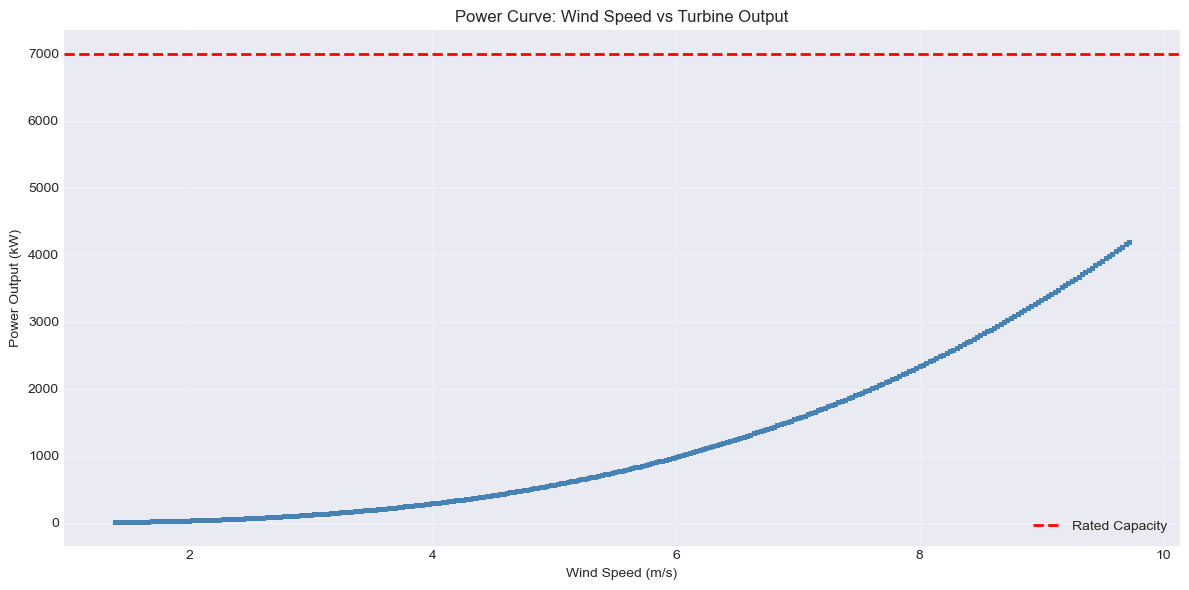

In [3]:
# Define physical constants and turbine parameters
air_density = 1.225  # kg/m³ at sea level, standard conditions
rotor_diameter = 154  # meters (diameter of rotor blades)
rotor_area = np.pi * (rotor_diameter / 2) ** 2  # m² - circular swept area (A = πr²)
rated_power = 7000  # kW - maximum power turbine can generate
power_coefficient = 0.40  # Efficiency factor (Betz limit is 0.593)

print("=== TURBINE SPECIFICATIONS ===")
print(f"Model: Siemens SWT-7.0-154")
print(f"Rated Power: {rated_power} kW")
print(f"Rotor Diameter: {rotor_diameter} m")
print(f"Rotor Area: {rotor_area:,.0f} m²")

# Convert wind speed from km/h to m/s (divide by 3.6)
wind_speed_ms = df_hourly['Wind_Speed_kmh'] / 3.6

# Calculate AVAILABLE power in the wind using the formula: P = 0.5 * ρ * A * v³
# Note: Power is CUBIC with wind speed - doubling wind speed = 8x power!
# Reference: https://en.wikipedia.org/wiki/Wind_power
available_power_kw = (0.5 * air_density * rotor_area * wind_speed_ms**3) / 1000

# Calculate ACTUAL turbine output accounting for power coefficient (efficiency)
# Use np.minimum() to cap power at rated capacity - turbine cannot exceed design limit
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.minimum.html
actual_power_kw = np.minimum(available_power_kw * power_coefficient, rated_power)

# Store actual power output back to dataframe for later analysis
df_hourly['Actual_Power_kW'] = actual_power_kw

print(f"\n=== POWER CALCULATION RESULTS ===")
print(f"Mean available power: {available_power_kw.mean():.0f} kW")
print(f"Mean actual output: {actual_power_kw.mean():.0f} kW")
# Capacity factor = actual output / rated capacity
# Higher = better (>35% is good, >45% is excellent)
# Reference: https://en.wikipedia.org/wiki/Capacity_factor
print(f"Capacity factor: {(actual_power_kw.mean() / rated_power * 100):.1f}%")
# Annual energy = average power × hours per year (8760)
print(f"Annual energy output: {(actual_power_kw.mean() * 8760 / 1000):.0f} MWh/year")

# Simple visualization showing power curve
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax.scatter(wind_speed_ms, actual_power_kw, alpha=0.3, s=5, color='steelblue')
ax.axhline(rated_power, color='red', linestyle='--', linewidth=2, label='Rated Capacity')
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Power Output (kW)')
ax.set_title('Power Curve: Wind Speed vs Turbine Output')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Section 4: Operating Range Analysis

Wind turbines operate within specific wind speed ranges:
- **Cut-in:** 3.5 m/s - Minimum speed to start generating power
- **Rated:** 13 m/s - Wind speed at which rated power is reached
- **Cut-out:** 25 m/s - Maximum operating wind speed for safety

Understanding what percentage of time the wind falls within operating range is critical for economic viability.

**Reference:** [IEC 61400-1 Wind turbine safety design requirements](https://webstore.iec.ch/)

=== OPERATING RANGE ANALYSIS ===

Cut-in speed: 12.6 km/h
Rated speed: 46.8 km/h
Cut-out speed: 90.0 km/h

Hours in each zone:
  Below cut-in: 44,125 hours (25.2%)
  Operating: 131,096 hours (74.8%)
  Above cut-out: 0 hours (0.0%)

*** 74.8% of the time turbine is operating! ***


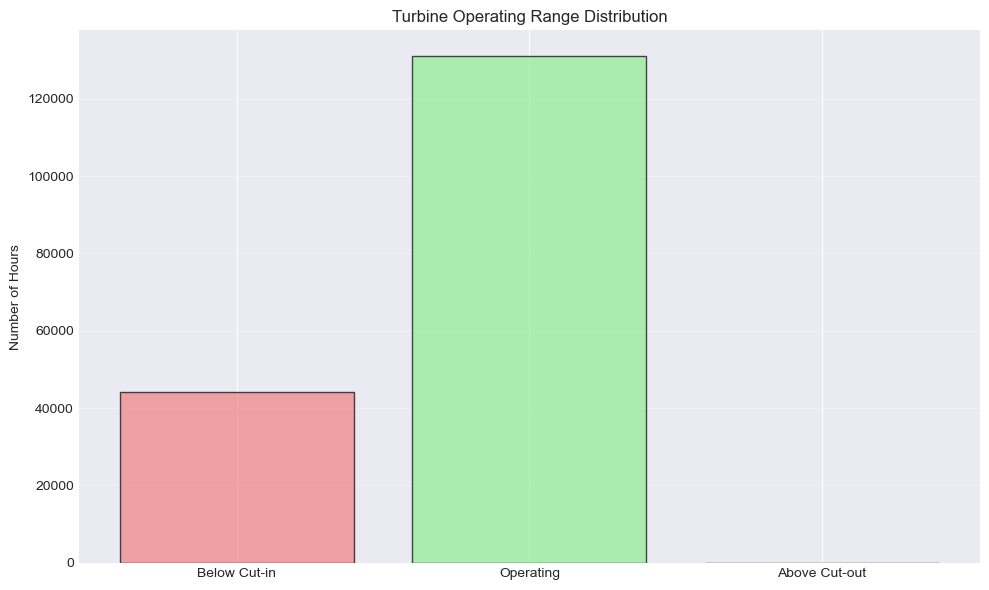

In [4]:
# Convert turbine operating speeds from m/s to km/h (multiply by 3.6)
cut_in = 3.5 * 3.6  # km/h - minimum speed to start generating power
rated_speed = 13 * 3.6  # km/h - speed at which rated power is reached
cut_out = 25 * 3.6  # km/h - maximum operating speed (safety shutdown)

# Count hours in each operating zone using boolean indexing
# Reference on pandas boolean indexing: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
below_cutin = (df_hourly['Wind_Speed_kmh'] < cut_in).sum()  # No power generation
operating = ((df_hourly['Wind_Speed_kmh'] >= cut_in) & (df_hourly['Wind_Speed_kmh'] < cut_out)).sum()  # Normal operation
above_cutout = (df_hourly['Wind_Speed_kmh'] >= cut_out).sum()  # Safety shutdown
total = len(df_hourly)  # Total hours in dataset

print("=== OPERATING RANGE ANALYSIS ===\n")
print(f"Cut-in speed: {cut_in:.1f} km/h")
print(f"Rated speed: {rated_speed:.1f} km/h")
print(f"Cut-out speed: {cut_out:.1f} km/h")
print(f"\nHours in each zone:")
print(f"  Below cut-in: {below_cutin:,} hours ({100*below_cutin/total:.1f}%)")
print(f"  Operating: {operating:,} hours ({100*operating/total:.1f}%)")
print(f"  Above cut-out: {above_cutout:,} hours ({100*above_cutout/total:.1f}%)")
print(f"\n*** {100*operating/total:.1f}% of the time turbine is operating! ***")

# Create bar chart showing operating range distribution
fig, ax = plt.subplots(figsize=(10, 6))
zones = ['Below Cut-in', 'Operating', 'Above Cut-out']
counts = [below_cutin, operating, above_cutout]
colors = ['lightcoral', 'lightgreen', 'lightyellow']
ax.bar(zones, counts, color=colors, edgecolor='black', alpha=0.7)
ax.set_ylabel('Number of Hours')
ax.set_title('Turbine Operating Range Distribution')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()